# Titanic - XGBoost

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [29]:
df = pd.read_csv("../titanic-clean.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    int64  
 1   Pclass    881 non-null    int64  
 2   Sex       881 non-null    int64  
 3   Age       881 non-null    float64
 4   SibSp     881 non-null    int64  
 5   Parch     881 non-null    int64  
 6   Embarked  881 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 48.3+ KB


## Categorical Features

In [31]:
df["Embarked"] = df["Embarked"].astype('category')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  881 non-null    int64   
 1   Pclass    881 non-null    int64   
 2   Sex       881 non-null    int64   
 3   Age       881 non-null    float64 
 4   SibSp     881 non-null    int64   
 5   Parch     881 non-null    int64   
 6   Embarked  881 non-null    category
dtypes: category(1), float64(1), int64(5)
memory usage: 42.4 KB


## Train / Test Split

In [33]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((704, 6), (177, 6))

## Training

In [34]:
model = XGBClassifier(n_estimators=10,
                      max_depth=3,
                      enable_categorical=True)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluation Metrics

In [35]:
model.score(X_test, y_test)

0.8587570621468926

In [36]:
model.score(X_train, y_train)

0.8352272727272727

In [37]:
predictions = model.predict(X_test)

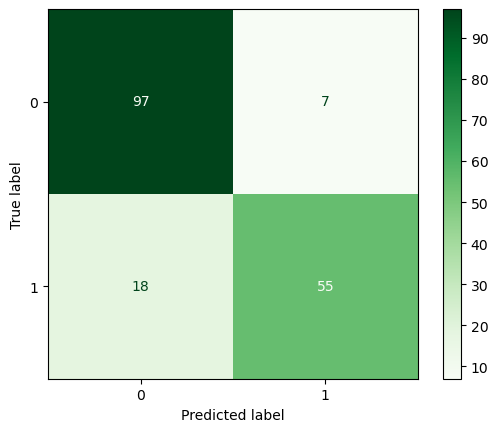

In [38]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

In [39]:
f1_score(y_test, predictions)

0.8148148148148148

## Important Features

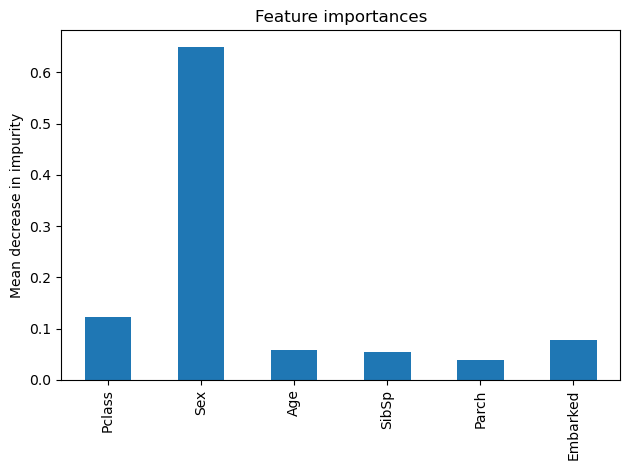

In [42]:
feature_importances = model.feature_importances_
series = pd.Series(feature_importances, index=X.columns)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()